In [65]:
from functools import partial
from typing import Callable
from numbers import Complex
from math import pi, e

import PIL
import glob
import imageio
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
import keras

print("TF VERSION: %s" % tf.__version__)

TF VERSION: 2.0.0


In [66]:
def Circle_Path(radius, iterations):
    r = radius
    c_n = []
    circle = 2*pi 
    for t in range(iterations):
        c = r*e**(t * circle/iterations * 1j)
        c_n.append(c)
    return c_n

In [67]:
def julia_set(mapping: Callable[[Complex], Complex],
            *,
            min_coordinate: Complex,
            max_coordinate: Complex,
            width: int,
            height: int,
            iterations_count: int = 256,
            threshold: float = 2.) -> np.ndarray:
    im, re = np.ogrid[min_coordinate.imag: max_coordinate.imag: height * 1j, min_coordinate.real : max_coordinate.real: width * 1j]

    z = (re + 1j * im).flatten()

    live, = np.indices(z.shape)
    iterations = np.empty_like(z, dtype=int)

    for i in range(iterations_count):
        z_live = z[live] = mapping(z[live])
        escaped = abs(z_live) > threshold
        iterations[live[escaped]] = i
        live = live[~escaped]
        if live.size == 0:
            break
        else:
            iterations[live] = iterations_count
    return iterations.reshape((height, width))

SyntaxError: invalid syntax (<ipython-input-63-59743750f742>, line 2)

In [68]:
def animator(Gif_out):
    with imageio.get_writer(Gif_out, mode='I') as writer:
        filenames = glob.glob('plot*.png')
        filenames = sorted(filenames)
        last = -1
        for i, filename in enumerate(filenames):
            frame = 2*(i**0.5)
            if round(frame) > round(last):
                last = frame
            else: 
                continue
            image = imageio.imread(filename)
            writer.append_data(image)

In [69]:
def generate_images(func, radius:int, iters:int, width, height, min_coord: Complex, max_coord: Complex):

    c_n = Circle_Path(radius, iters)

    for i in range(iters):
        mapping = partial(func, c = c_n[i])

        image = julia_set(mapping,
                min_coordinate= min_coord,
                max_coordinate= max_coord,
                width= width,
                height= height)
        plt.axis('off')
        plt.imshow(image, cmap='terrain')
        plt.savefig('plot_{:04d}.png'.format(i), dpi=400)

In [70]:
def sample_plot(func, width, height, min_coord: Complex, max_coord: Complex):

    c_n = Circle_Path(1, 16)
    examples = []
    for i in range(16):
        mapping = partial(func, c = c_n[i])
        example = julia_set(mapping,
        min_coordinate= min_coord,
        max_coordinate= max_coord,
        width= width,
        height= height)
        examples.append(example)

    fig = plt.figure(figsize=(4,4))
    for i in range(16):
        plt.axis('off')
        plt.subplot(4,4, i+1)
        plt.imshow(examples[i], cmap='terrain')
    plt.show()

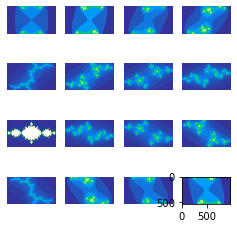

In [71]:
func = lambda z, c : z**2 + c
sample_plot(func,960,540,-1.5-1j,1.5+1j)